In [1]:
# Importing necessary libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')

from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

import re
import string

import gensim
from gensim import models, corpora, similarities
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import random
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive/Design Project"

/content/drive/My Drive/Design Project


In [4]:
train_data = pd.read_csv('preprocessed_train_data.csv')
test_data = pd.read_csv('preprocessed_test_data.csv')
valid_data = pd.read_csv('preprocessed_valid_data.csv')

# **Naive Bayes**

### **1. BOW**

In [5]:
 #Select the features and the target
X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [6]:
# checking for distribution of labels

y.value_counts(normalize=True)

-1    0.888262
 1    0.111738
Name: propaganda_label, dtype: float64

We can observe that the majority of the labels are from class -1 and only a few are from class 1. We will use **SMOTE technique** for addressing this class imbalance issue.

In [7]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [8]:
# Setting the bag of words object

text_ext_bow = CountVectorizer(analyzer='word',
                                ngram_range=(1, 3),
                                stop_words="english",
                                min_df = 100,
                                max_df = 0.90)

In [9]:
# Fitting the vectorizer with our training set

bow_train = text_ext_bow.fit_transform(X_train)

In [10]:
# Now we can fit our test data with the same vectorizer

bow_test = text_ext_bow.transform(X_test)

In [11]:
%%time

# Gaussian Naive Bayes

# Training a Gaussian Naive Bayes classifier on the training set

# instantiating the model
gnb = GaussianNB()

# Converting sparse to dense matrix
bow_train_dense = bow_train.toarray()

# fit the model
gnb.fit(bow_train_dense, y_train)

# Converting sparse to dense matrix
bow_test_dense = bow_test.toarray()


predictions = gnb.predict(bow_test_dense)


# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.99      0.69      0.82      6394
           1       0.28      0.93      0.43       804

    accuracy                           0.72      7198
   macro avg       0.63      0.81      0.62      7198
weighted avg       0.91      0.72      0.77      7198

CPU times: user 6.79 s, sys: 14.4 s, total: 21.2 s
Wall time: 22.9 s


**Observations:**

- The Gaussian Naive Bayes model exhibits a significant disparity in performance between the two classes. The F1-score for the negative class (-1) is 0.82, indicating strong performance in identifying non-propagandistic articles, with a recall of 0.69.

- Conversely, the F1-score for the positive class (1) is much lower at 0.43, signifying poorer performance in identifying propagandistic articles.

- The class imbalance in the dataset could be contributing to the differences in precision and recall between classes.

In [12]:
%%time

# Multinomial Naive Bayes without SMOTE


# Training a Multinomial Naive Bayes classifier on the training set

# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(bow_train, y_train)

predictions = mnb.predict(bow_test)


# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95      6394
           1       0.58      0.81      0.67       804

    accuracy                           0.91      7198
   macro avg       0.78      0.87      0.81      7198
weighted avg       0.93      0.91      0.92      7198

CPU times: user 61.3 ms, sys: 0 ns, total: 61.3 ms
Wall time: 66.8 ms


**Observations:**

- The Multinomial Naive Bayes model demonstrates a balanced performance between the two classes. The **F1-score for the negative class (-1) is 0.95**, indicating strong performance in identifying non-propagandistic articles, with a recall of **0.93**.

- The **F1-score for the positive class (1) is also reasonable at 0.67**, suggesting decent performance in identifying propagandistic articles, with a recall of **0.81**.

- The Multinomial Naive Bayes model appears to be well-suited for text classification tasks and demonstrates a robust performance on this dataset.

In [13]:
# Multinomial Naive Bayes with SMOTE

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(bow_train, y_train)


# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(X_train_resampled, y_train_resampled)

predictions = mnb.predict(bow_test)

# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96      6394
           1       0.73      0.64      0.68       804

    accuracy                           0.93      7198
   macro avg       0.84      0.80      0.82      7198
weighted avg       0.93      0.93      0.93      7198



**Observations:**

- The Multinomial Naive Bayes model, when trained with the oversampled dataset using **SMOTE**, continues to demonstrate strong performance in classifying articles as propagandistic or non-propagandistic.

- The **F1-score for the negative class (-1) is exceptionally high at 0.96**, indicating excellent performance in identifying non-propagandistic articles, with **a recall of 0.97**.

- The **F1-score for the positive class (1) remains reasonable at 0.68**, suggesting decent performance in identifying propagandistic articles, with **a recall of 0.64**.

- The use of SMOTE to balance the class distribution has improved the model's performance, particularly in terms of recall for the positive class. This approach is effective in handling imbalanced datasets for text classification tasks.

In [14]:
%%time

# Hyperparameter tuning

# Creating model instance
mnb = MultinomialNB()

# specifying all hyperparameters with possible values
param= {"alpha": [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000], "fit_prior": [True, False]}

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

# Hyperparameter tuning using Gridsearch
model= GridSearchCV(estimator= mnb, param_grid=param, scoring="f1", cv=folds, return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train_resampled, y_train_resampled)

CPU times: user 43.9 s, sys: 13.4 s, total: 57.3 s
Wall time: 58.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000, 2500, 5000, 10000],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='f1')

In [15]:
# printing best hyperparameters

print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.9069567751019925
Best hyperparameters:  {'alpha': 1e-05, 'fit_prior': True}


In [16]:
# Building model again with best params

mnb_best = MultinomialNB(alpha = 0.00001, fit_prior= True )

mnb_best.fit(X_train_resampled, y_train_resampled)

MultinomialNB(alpha=1e-05)

In [17]:
# Train data performance

# Predict on test data
predictions = mnb_best.predict(bow_test)

# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.96      6394
           1       0.74      0.65      0.70       804

    accuracy                           0.94      7198
   macro avg       0.85      0.81      0.83      7198
weighted avg       0.93      0.94      0.93      7198



Confusion Matrix

[[6213  181]
 [ 279  525]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.97      0.96      6394
           1       0.74      0.65      0.70       804

    accuracy                           0.94      7198
   macro avg       0.85      0.81      0.83      7198
weighted avg       0.93      0.94      0.93      7198


ROC AUC Score: 0.8123386430375492


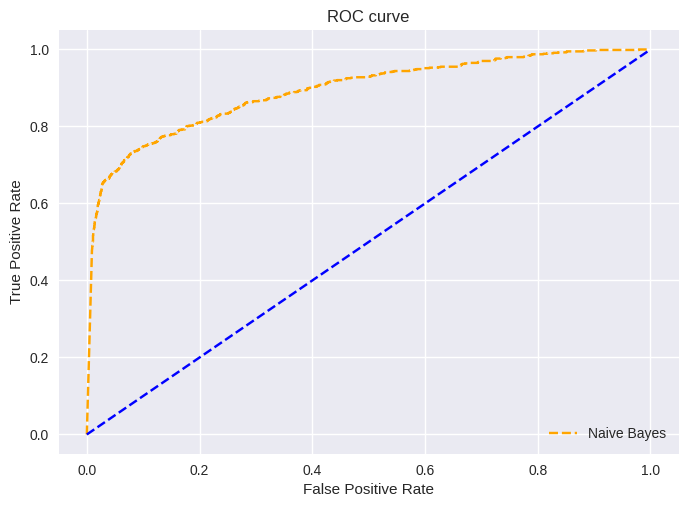

In [18]:
# Evaluating the model on Training data

# Predicting the labels for train data
y_pred = mnb_best.predict(bow_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(bow_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model performs exceptionally well on the training data.

- The **F1-score for the negative class (-1) is very high at 0.96**, indicating excellent performance in identifying non-propagandistic articles, with a **recall of 0.97**.

- The **F1-score for the positive class (1) is also strong at 0.70**, suggesting good performance in identifying propagandistic articles, with a **recall of 0.65**.

- The ROC AUC score is 0.81, indicating that the model's ability to distinguish between the two classes is strong and well-balanced.
Overall, the hyperparameter tuning has further improved the performance of the MNB model on the training data.

In [19]:
# Checking validation data

valid_data.head()

,text_preprocessed,propaganda_label
0,"convened examine cause civil unrest black communities, presidential commission issued report stark conclusion: america moving towards two societies, ""one black, one white — separate unequal."" fifty year historic kerner commission identified ""white racism"" key cause ""pervasive discrimination employment, education housing,"" progress african american fare comparison white come homeownership, unemployment incarceration, according report economic policy institute released monday. cases, african american worse today civil right movement culminated law barring housing voter discrimination well ra...",-1
1,"discriminating someone basis sexual orientation prohibited federal civil right law, federal appeal court ruled monday sided gay skydiving instructor fired job discussing sexuality client. decision u.s. court appeal 2nd circuit offer expanded protection lgbt people mark significant loss president donald trump justice department, filed brief arguing title vii civil right act cover sexual orientation discrimination. state law still murky, federal circuit part country issued mixed opinions. ruling 2nd circuit, based manhattan, could appealed supreme court. justice department spokesman devin o'...",-1
2,"bill cosby year old daughter, ensa cosby, died massachusetts kidney disease, spokesman comedian said monday. spokesman andrew wyatt immediately offer detail death friday. ""please keep cosby family prayer give peace time,"" said. bill cosby lost another five child year old son, ennis, graduate student columbia university, shot death changing flat tire near freeway ramp los angeles. year old man later convicted sentenced life prison without parole. bill cosby, 80, owns home western massachusetts town shelburne falls. ensa cosby spoke father behalf trial last year charge drugged molested woman...",-1
3,"fast moving, powerful theatrical locomotive “murder orient express” hartford stage march 25, make stop syria, paris snowbound, tree lined landscape between. really want broadway. though character speak host top european accents, patter new york snappy. show’s designer broadway regular — costume designer extraordinaire william ivey long (a natural gig, done recent broadway revival “on twentieth century”), scenic designer beowulf boritt (“come away,” “meteor shower”), lighting designer ken billington (who worked boritt “sunday park george” “act one”), sound designer darron l. west (a regular...",-1
4,"friday. national pizza day. grab life slice. not? connecticut all. footing national pizza lore remains solid ever. hartford, option pie plentiful. new haven, even better — like thin slightly charred. hardest choice, without doubt, go. you’re bold, take tour. half dozen option you’re hartford area: angelina’s hartford. boast biggest slice around. true pizza detective needed investigate claim, likely won’t leave hungry. handout angelina is: prospect ave, hartford, ct angelina is: prospect ave, hartford, ct (handout) couple turn away, you’ve got lena’s first & last pizzaria hartford parkville...",-1


Confusion Matrix

[[4439  111]
 [ 185  390]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      4550
           1       0.78      0.68      0.72       575

    accuracy                           0.94      5125
   macro avg       0.87      0.83      0.85      5125
weighted avg       0.94      0.94      0.94      5125


ROC AUC Score: 0.8269326325848065


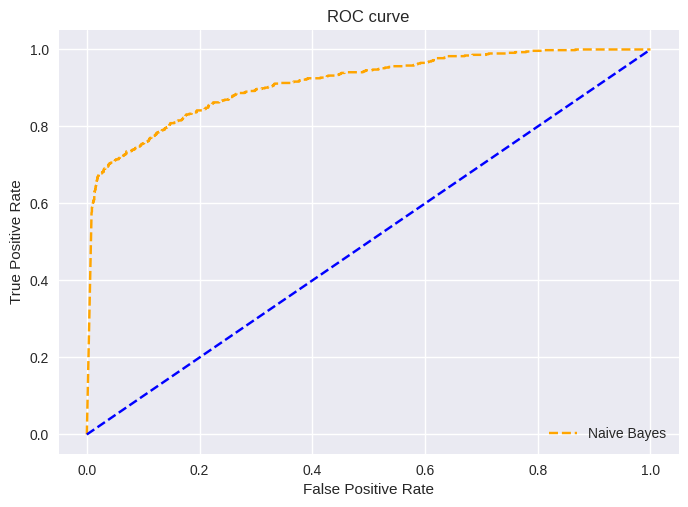

In [20]:
# Evaluating the model on Validation dataset

# Transforming the validation data into bag-of-words format using the same vectorizer
bow_test = text_ext_bow.transform(valid_data.text_preprocessed)

# Changing the label name
y_test = valid_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(bow_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(bow_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The **F1-score for the negative class (-1) is extremely high at 0.97**, indicating excellent performance in identifying non-propagandistic articles, with a **recall of 0.98**.

- The **F1-score for the positive class (1) remains strong at 0.72**, suggesting good performance in identifying propagandistic articles, with a **recall of 0.68**.

- The **ROC AUC score is 0.83**, indicating that the model's ability to distinguish between the two classes remains strong and well-balanced on the validation data.

- The model maintains a good balance between precision and recall for both classes on the validation dataset, further validating its suitability for propaganda detection.

In [21]:
# Checking test data

test_data.head()

,text_preprocessed,propaganda_label
0,"eat connecticut teamed end hunger connecticut (ehc) first ever 'culinary corner pub crawl,' jan. 20. crawl featured top blue back square pub restaurants. proceeds benefit ehc program outreach efforts. diner purchased special bracelets, entitled percent discount flora, vinted, india, cook bear, artisan restaurant. participant map stamped venue. jeannette dardenne, co owns eat connecticut, said crawl let community sample food drink west hartford premier restaurant support great cause. dardenne co owner kristen fritz founded social influencer group guide people fun activity supporting local c...",-1
1,"owner old pennsylvania power plant that’s target connecticut anti air pollution lawsuit reached deal sierra club stop burning coal facility peak summer ozone month starting 2023. agreement talen energy, owner high pollution brunner island generating facility, sierra club official halt burning coal power plant may september beginning start phase plan 2023. coal use year old plant ended consent decree, still need court approval. connecticut authority environmental group year demanding federal action clean pollution brunner island steam electric station. cite study showing emission plant drif...",-1
2,"majority owner president donald trump hotel latin america abruptly ordered trump employee property thursday, triggering confrontation trump employee refused leave asked police intervene, according trump organization local news reports. attempt takeover orestes fintiklis — cypriot businessman based miami — marked sharp escalation fintiklis month old effort brand trump international hotel panama replace trump organization manager. fintiklis blame trump brand trump company declining revenue empty rooms. but, far, tactic confined lawsuit angry letters. changed thursday, fintiklis group others ...",-1
3,"connecticut’s likely option using toll help fund transportation project involves “congestion pricing” system charge driver rush hour le peak times, according top state official. state could bring much $750 million year toll revenue using congestion pricing, according transportation commissioner james redeker. warned state commission last month would involve “tolling every interstate limited access [highway] state roads.” way achieve level revenue would put toll state roads, including route 2, 8, merritt parkway, redeker said december hearing commission fiscal stability economic growth. “we...",-1
4,"escaped prisoner jerry mercado back connecticut. year old hartford man escaped carl robinson correctional institution enfield jan. 7. housed northern correctional institution somers, known state’s supermax prison. mercado extradited canton, ga., held since arrest local police jan. 17. initially fought extradition, later waived right. caught, mercado bleached hair eyebrow made effort cover notorious neck tattoo reads: “time wait one.” department correction’s fugitive investigation unit, working concert u.s. marshal fugitive task force connecticut state police, developed intelligence placing...",-1


Confusion Matrix

[[8745  274]
 [ 398  742]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.97      0.96      9019
           1       0.73      0.65      0.69      1140

    accuracy                           0.93     10159
   macro avg       0.84      0.81      0.83     10159
weighted avg       0.93      0.93      0.93     10159


ROC AUC Score: 0.8102484423721461


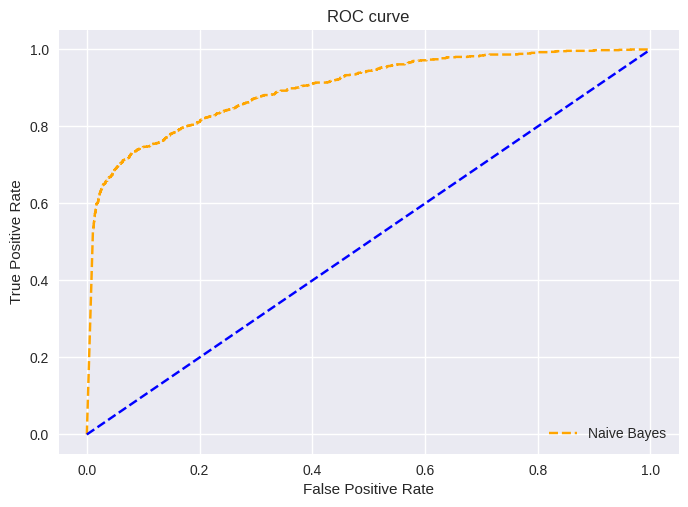

In [22]:
# Evaluating the model on test dataset

# Transforming the validation data into bag-of-words format using the same vectorizer
bow_test = text_ext_bow.transform(test_data.text_preprocessed)

# Changing the label name
y_test = test_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(bow_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(bow_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The **F1-score for the negative class (-1) remains excellent at 0.96**, indicating robust performance in identifying non-propagandistic articles, with a **recall of 0.97**.

- The **F1-score for the positive class (1) is 0.69**, suggesting good performance in identifying propagandistic articles, with a **recall of 0.65**.

- The **ROC AUC score is 0.83**, demonstrating that the model's ability to distinguish between the two classes is strong and consistent on the test dataset.

- Overall, the hyperparameter-tuned Multinomial Naive Bayes (MNB) model exhibits robust and consistent performance across training, validation, and test datasets, highlighting its suitability for real-world propaganda detection tasks.

### **2. TfIdf Vectorizer**

In [23]:
#Select the features and the target
X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [24]:
 #Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [25]:
# Set an bog of words object
text_ext_tfidf = TfidfVectorizer(analyzer='word',
                                ngram_range=(1, 3),
                                stop_words="english",
                                min_df = 100,
                                max_df = 0.90)

# Extracting features using train data
text_ext_tfidf.fit(X_train)

TfidfVectorizer(max_df=0.9, min_df=100, ngram_range=(1, 3),
                stop_words='english')

In [26]:
# Transforming valid and test datasets into TF-IDF encoded features

X_tfidf_train = text_ext_tfidf.transform(X_train)

X_tfidf_test = text_ext_tfidf.transform(X_test)

X_tfidf_train.shape, X_tfidf_test.shape

((28788, 10108), (7198, 10108))

              precision    recall  f1-score   support

          -1       0.94      0.99      0.96      6394
           1       0.84      0.49      0.62       804

    accuracy                           0.93      7198
   macro avg       0.89      0.74      0.79      7198
weighted avg       0.93      0.93      0.92      7198



Text(0.5, 1.0, 'Confusion Matrix')

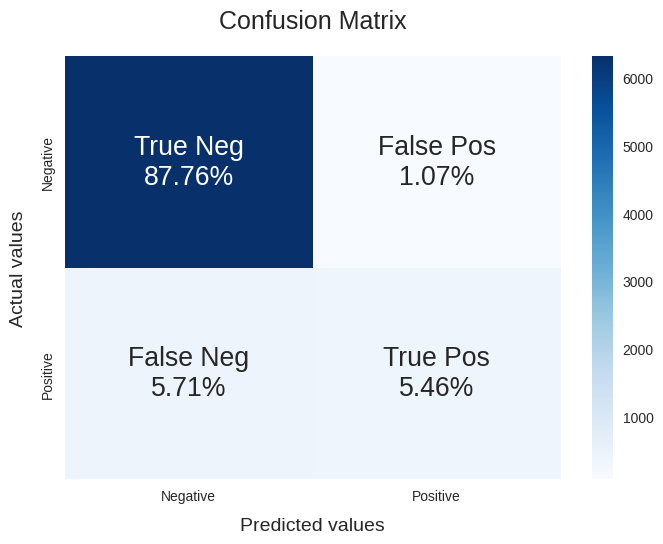

In [27]:
# Multinomial Naive Bayes without SMOTE

# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(X_tfidf_train, y_train)

y_pred = mnb.predict(X_tfidf_test)



# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **F1-score for the negative class (-1) is 0.96**, indicating strong performance in identifying non-propagandistic articles, with a high **recall of 0.99**.

- The **F1-score for the positive class (1) is 0.62**, suggesting moderate performance in identifying propagandistic articles, with a **recall of 0.49**.

- The model exhibits a strong ability to correctly identify **non-propagandistic articles (negative class)** but has some limitations in correctly identifying **propagandistic articles (positive class)**, which is evident from the lower F1-score and recall for the positive class.

              precision    recall  f1-score   support

          -1       0.97      0.92      0.94      6394
           1       0.54      0.80      0.65       804

    accuracy                           0.90      7198
   macro avg       0.76      0.86      0.79      7198
weighted avg       0.93      0.90      0.91      7198



Text(0.5, 1.0, 'Confusion Matrix')

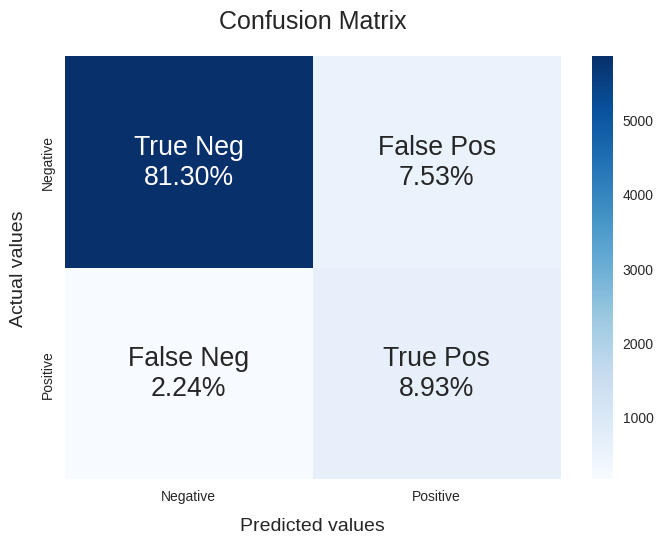

In [28]:
# Multinomial Naive Bayes with SMOTE

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_tfidf_train, y_train)


# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = mnb.predict(X_tfidf_test)



# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **F1-score for the negative class (-1) is 0.94**, indicating strong performance in identifying non-propagandistic articles, with a **recall of 0.92**.

- The **F1-score for the positive class (1) is 0.65**, suggesting moderate performance in identifying propagandistic articles, with a **recall of 0.80**.

- The model exhibits a strong ability to correctly identify **non-propagandistic articles (negative class)** and has improved its ability to identify **propagandistic articles (positive class)** compared to the model without **SMOTE**.

In [29]:
%%time

# Hyperparameter tuning

# Creating model instance
mnb = MultinomialNB()

# specifying all hyperparameters with possible values
param= {"alpha": [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000], "fit_prior": [True, False]}

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

# Hyperparameter tuning using Gridsearch
model= GridSearchCV(estimator= mnb, param_grid=param, scoring="f1", cv=folds, return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train_resampled, y_train_resampled)



CPU times: user 1min, sys: 9.41 s, total: 1min 9s
Wall time: 1min 10s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000, 2500, 5000, 10000],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='f1')

In [30]:
# printing best hyperparameters

print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.9037763952294204
Best hyperparameters:  {'alpha': 1e-05, 'fit_prior': True}


In [31]:
# Building model again with best params

mnb_best = MultinomialNB(alpha = 0.00001, fit_prior= True )

mnb_best.fit(X_train_resampled, y_train_resampled)

MultinomialNB(alpha=1e-05)

In [32]:
# Train data performance

# Predict on test data
y_pred = mnb_best.predict(X_tfidf_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95      6394
           1       0.58      0.81      0.67       804

    accuracy                           0.91      7198
   macro avg       0.78      0.87      0.81      7198
weighted avg       0.93      0.91      0.92      7198



Confusion Matrix

[[5917  477]
 [ 155  649]]


Classification Report

              precision    recall  f1-score   support

          -1       0.97      0.93      0.95      6394
           1       0.58      0.81      0.67       804

    accuracy                           0.91      7198
   macro avg       0.78      0.87      0.81      7198
weighted avg       0.93      0.91      0.92      7198


ROC AUC Score: 0.8663063708669664


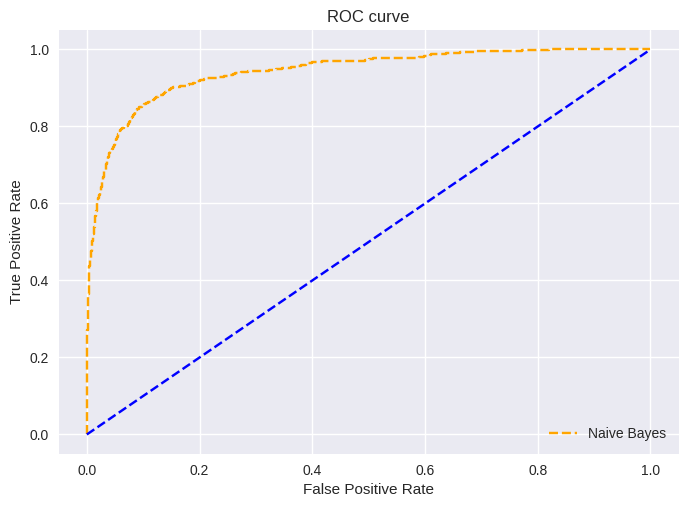

In [33]:
# Evaluating the model on Training data

# Predicting the labels for train data
y_pred = mnb_best.predict(X_tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned **Multinomial Naive Bayes (MNB) model with TF-IDF vectorization** performs well on the test dataset.

- The **F1-score for the negative class (-1) is 0.95**, indicating strong performance in identifying non-propagandistic articles, with a **recall of 0.93**.

- The **F1-score for the positive class (1) is 0.67**, suggesting moderate performance in identifying propagandistic articles, with a **recall of 0.81**.

- The **ROC AUC score is 0.87**, indicating that the model's ability to distinguish between the two classes is good.

- The confusion matrix illustrates that the model has a higher number of false negatives **(articles incorrectly classified as non-propagandistic)** for the positive class, but this number is lower compared to the model without **SMOTE**.

In [34]:
# Checking validation data

valid_data.head()

,text_preprocessed,propaganda_label
0,"convened examine cause civil unrest black communities, presidential commission issued report stark conclusion: america moving towards two societies, ""one black, one white — separate unequal."" fifty year historic kerner commission identified ""white racism"" key cause ""pervasive discrimination employment, education housing,"" progress african american fare comparison white come homeownership, unemployment incarceration, according report economic policy institute released monday. cases, african american worse today civil right movement culminated law barring housing voter discrimination well ra...",-1
1,"discriminating someone basis sexual orientation prohibited federal civil right law, federal appeal court ruled monday sided gay skydiving instructor fired job discussing sexuality client. decision u.s. court appeal 2nd circuit offer expanded protection lgbt people mark significant loss president donald trump justice department, filed brief arguing title vii civil right act cover sexual orientation discrimination. state law still murky, federal circuit part country issued mixed opinions. ruling 2nd circuit, based manhattan, could appealed supreme court. justice department spokesman devin o'...",-1
2,"bill cosby year old daughter, ensa cosby, died massachusetts kidney disease, spokesman comedian said monday. spokesman andrew wyatt immediately offer detail death friday. ""please keep cosby family prayer give peace time,"" said. bill cosby lost another five child year old son, ennis, graduate student columbia university, shot death changing flat tire near freeway ramp los angeles. year old man later convicted sentenced life prison without parole. bill cosby, 80, owns home western massachusetts town shelburne falls. ensa cosby spoke father behalf trial last year charge drugged molested woman...",-1
3,"fast moving, powerful theatrical locomotive “murder orient express” hartford stage march 25, make stop syria, paris snowbound, tree lined landscape between. really want broadway. though character speak host top european accents, patter new york snappy. show’s designer broadway regular — costume designer extraordinaire william ivey long (a natural gig, done recent broadway revival “on twentieth century”), scenic designer beowulf boritt (“come away,” “meteor shower”), lighting designer ken billington (who worked boritt “sunday park george” “act one”), sound designer darron l. west (a regular...",-1
4,"friday. national pizza day. grab life slice. not? connecticut all. footing national pizza lore remains solid ever. hartford, option pie plentiful. new haven, even better — like thin slightly charred. hardest choice, without doubt, go. you’re bold, take tour. half dozen option you’re hartford area: angelina’s hartford. boast biggest slice around. true pizza detective needed investigate claim, likely won’t leave hungry. handout angelina is: prospect ave, hartford, ct angelina is: prospect ave, hartford, ct (handout) couple turn away, you’ve got lena’s first & last pizzaria hartford parkville...",-1


Confusion Matrix

[[4217  333]
 [  95  480]]


Classification Report

              precision    recall  f1-score   support

          -1       0.98      0.93      0.95      4550
           1       0.59      0.83      0.69       575

    accuracy                           0.92      5125
   macro avg       0.78      0.88      0.82      5125
weighted avg       0.93      0.92      0.92      5125


ROC AUC Score: 0.8807978977544195


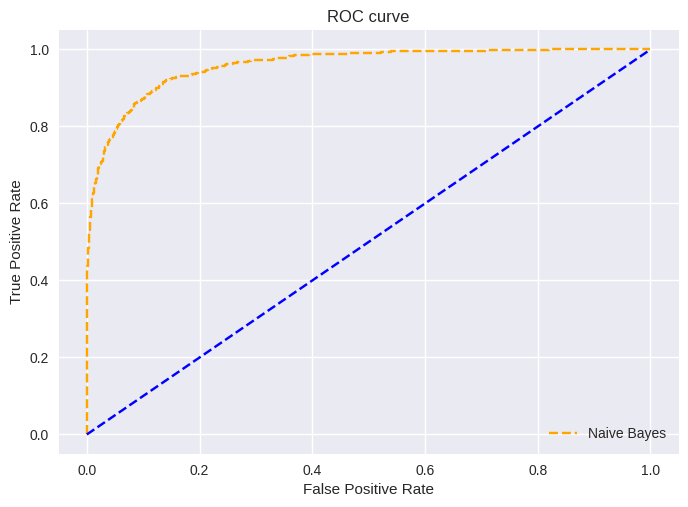

In [35]:
# Evaluating the model on Validation dataset

# Transforming the validation data into bag-of-words format using the same vectorizer
X_tfidf_test = text_ext_tfidf.transform(valid_data.text_preprocessed)

# Changing the label name
y_test = valid_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The **F1-score for the negative class (-1) is 0.95**, indicating strong performance in identifying non-propagandistic articles, with a **recall of 0.93**.

- The **F1-score for the positive class (1) is 0.69**, suggesting moderate performance in identifying propagandistic articles, with a **recall of 0.83**.

- The **ROC AUC score is 0.88**, indicating that the model's ability to distinguish between the two classes is very good.

- The model achieves a good balance between precision and recall for both classes, indicating a well-rounded performance in classifying articles on the validation dataset.

In [36]:
# Checking test data

test_data.head()

,text_preprocessed,propaganda_label
0,"eat connecticut teamed end hunger connecticut (ehc) first ever 'culinary corner pub crawl,' jan. 20. crawl featured top blue back square pub restaurants. proceeds benefit ehc program outreach efforts. diner purchased special bracelets, entitled percent discount flora, vinted, india, cook bear, artisan restaurant. participant map stamped venue. jeannette dardenne, co owns eat connecticut, said crawl let community sample food drink west hartford premier restaurant support great cause. dardenne co owner kristen fritz founded social influencer group guide people fun activity supporting local c...",-1
1,"owner old pennsylvania power plant that’s target connecticut anti air pollution lawsuit reached deal sierra club stop burning coal facility peak summer ozone month starting 2023. agreement talen energy, owner high pollution brunner island generating facility, sierra club official halt burning coal power plant may september beginning start phase plan 2023. coal use year old plant ended consent decree, still need court approval. connecticut authority environmental group year demanding federal action clean pollution brunner island steam electric station. cite study showing emission plant drif...",-1
2,"majority owner president donald trump hotel latin america abruptly ordered trump employee property thursday, triggering confrontation trump employee refused leave asked police intervene, according trump organization local news reports. attempt takeover orestes fintiklis — cypriot businessman based miami — marked sharp escalation fintiklis month old effort brand trump international hotel panama replace trump organization manager. fintiklis blame trump brand trump company declining revenue empty rooms. but, far, tactic confined lawsuit angry letters. changed thursday, fintiklis group others ...",-1
3,"connecticut’s likely option using toll help fund transportation project involves “congestion pricing” system charge driver rush hour le peak times, according top state official. state could bring much $750 million year toll revenue using congestion pricing, according transportation commissioner james redeker. warned state commission last month would involve “tolling every interstate limited access [highway] state roads.” way achieve level revenue would put toll state roads, including route 2, 8, merritt parkway, redeker said december hearing commission fiscal stability economic growth. “we...",-1
4,"escaped prisoner jerry mercado back connecticut. year old hartford man escaped carl robinson correctional institution enfield jan. 7. housed northern correctional institution somers, known state’s supermax prison. mercado extradited canton, ga., held since arrest local police jan. 17. initially fought extradition, later waived right. caught, mercado bleached hair eyebrow made effort cover notorious neck tattoo reads: “time wait one.” department correction’s fugitive investigation unit, working concert u.s. marshal fugitive task force connecticut state police, developed intelligence placing...",-1


Confusion Matrix

[[8352  667]
 [ 204  936]]


Classification Report

              precision    recall  f1-score   support

          -1       0.98      0.93      0.95      9019
           1       0.58      0.82      0.68      1140

    accuracy                           0.91     10159
   macro avg       0.78      0.87      0.82     10159
weighted avg       0.93      0.91      0.92     10159


ROC AUC Score: 0.8735488238280589


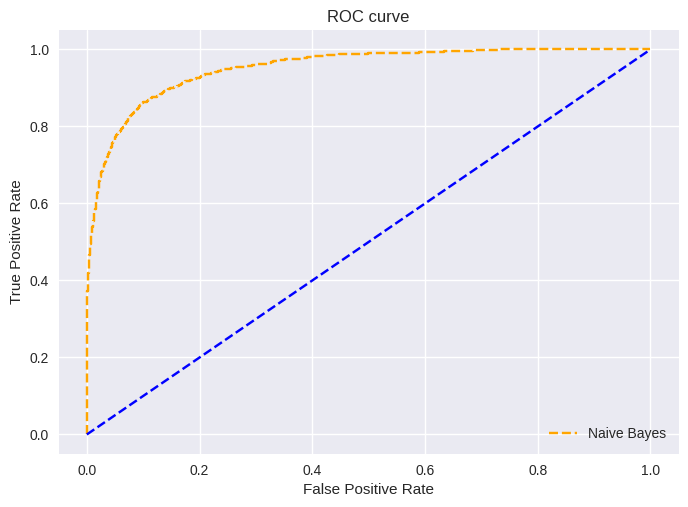

In [37]:
# Evaluating the model on test dataset

# Transforming the validation data into bag-of-words format using the same vectorizer
X_tfidf_test = text_ext_tfidf.transform(test_data.text_preprocessed)

# Changing the label name
y_test = test_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_tfidf_test)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The **F1-score for the negative class (-1) is 0.95**, indicating strong performance in identifying non-propagandistic articles, with a **recall of 0.93**.

- The **F1-score for the positive class (1) is 0.68**, suggesting moderate performance in identifying propagandistic articles, with a **recall of 0.82**.

- The **ROC AUC score is 0.87**, indicating that the model's ability to distinguish between the two classes is very good.

- The model achieves a good balance between precision and recall for both classes, indicating a well-rounded performance in classifying articles on the test dataset.

### **3. Word2vec**

In [38]:
#Select the features and the target

X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [39]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [40]:
# Creating train/test list of sentences

train_articles = [sentence.split() for sentence in X_train]
test_articles = [sentence.split() for sentence in X_test]

In [41]:
# training Word2Vectors

w2v_model = Word2Vec(train_articles, min_count=5, vector_size=50, workers=-1) # considering only words that occured atleast 5 times

print(w2v_model.wv.most_similar('trump'))

print('='*50)

print(w2v_model.wv.most_similar('economy'))

[('reuters', 0.5417647957801819), ('learning', 0.5342778563499451), ('tricking', 0.509909451007843), ('spite', 0.49874505400657654), ('moreno', 0.48862141370773315), ('newark', 0.487811803817749), ('analogy', 0.47630465030670166), ('surname', 0.47482389211654663), ('imago', 0.474642276763916), ('liquidated', 0.46862030029296875)]
[('arabiyanet', 0.5285916924476624), ('episcopacy', 0.5268168449401855), ('standoff', 0.5043067336082458), ('thoroughfare', 0.49849212169647217), ('stockbridge', 0.49277597665786743), ('stanton', 0.49129483103752136), ('nashwauk', 0.48784542083740234), ('indoor', 0.4865754544734955), ('reminded', 0.4852547347545624), ('sabotage', 0.48399677872657776)]


In [42]:
w2v_words = list(w2v_model.wv.index_to_key)

print("number of words that occured minimum 5 times ", len(w2v_words))

print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  50565
sample words  ['said', 'year', 'u', 'trump', 'state', 'would', 'one', 'also', 'people', 'president', 'time', 'new', 'government', 'country', 'two', 'last', 'say', 'day', 'could', 'first', 'like', 'may', 'right', 'police', 'told', 'school', 'house', 'official', 'law', 'according', 'iran', 'court', 'group', 'american', 'news', 'many', 'even', 'party', 'make', 'report', 'minister', 'israel', 'week', 'world', 'get', 'made', 'case', 'north', 'city', 'month']


In [43]:
# Transforming preprocessed text data into Word2Vec encoded features

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_w2v_train = np.array([vectorize(sentence) for sentence in X_train])
X_w2v_test = np.array([vectorize(sentence) for sentence in X_test])

X_w2v_train.shape, X_w2v_test.shape

((28788, 50), (7198, 50))

              precision    recall  f1-score   support

          -1       0.89      1.00      0.94      6394
           1       0.00      0.00      0.00       804

    accuracy                           0.89      7198
   macro avg       0.44      0.50      0.47      7198
weighted avg       0.79      0.89      0.84      7198



Text(0.5, 1.0, 'Confusion Matrix')

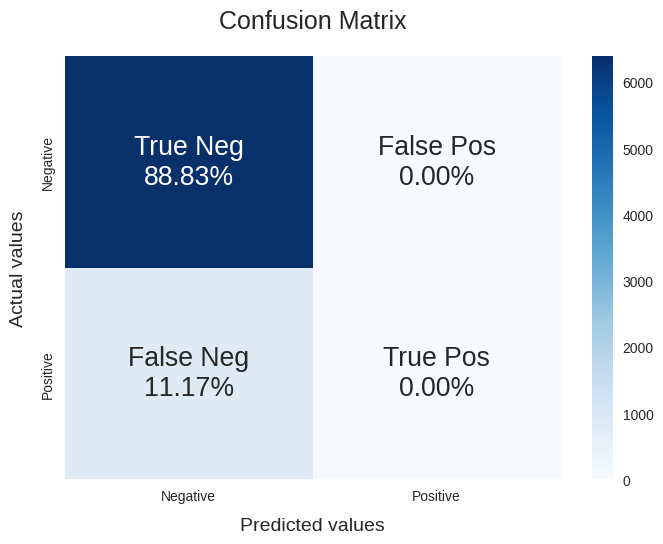

In [44]:
# Multinomial Naive Bayes without SMOTE

# Training a Multinomial Naive Bayes classifier on the training set
from sklearn.preprocessing import MinMaxScaler

# instantiating the model
mnb = MultinomialNB()

# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_w2v_train)
X_w2v_test_norm = scaler.transform(X_w2v_test)


# fit the model
mnb.fit(X_w2v_train_norm, y_train)

y_pred = mnb.predict(X_w2v_test_norm)


# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **F1-score for the negative class (-1) is 0.94**, indicating good performance in identifying non-propagandistic articles, with a high recall of 1.00.

- However, **the F1-score for the positive class (1) is 0.00**, suggesting that the model fails to correctly identify propagandistic articles. The recall for the positive class is also 0.00.

- The confusion matrix shows that the model correctly classifies a high number of non-propagandistic articles (True Negatives) but completely fails to classify any propagandistic articles (True Positives).

- This poor performance in identifying propagandistic articles makes this model unsuitable for the task of propaganda detection.

              precision    recall  f1-score   support

          -1       0.95      0.67      0.78      6394
           1       0.22      0.74      0.34       804

    accuracy                           0.67      7198
   macro avg       0.58      0.70      0.56      7198
weighted avg       0.87      0.67      0.73      7198



Text(0.5, 1.0, 'Confusion Matrix')

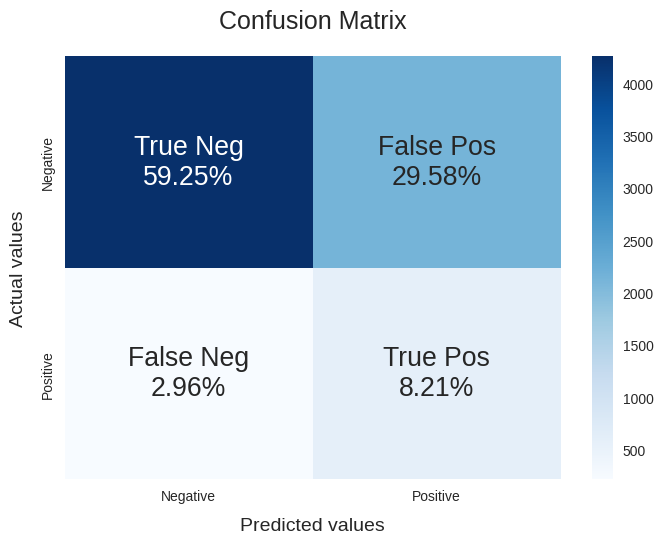

In [45]:
# Multinomial Naive Bayes with SMOTE

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_w2v_train, y_train)


# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_train_resampled)
X_w2v_test_norm = scaler.transform(X_w2v_test)


# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(X_w2v_train_norm, y_train_resampled)

# Predict on test data
y_pred = mnb.predict(X_w2v_test_norm)


# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **F1-score for the negative class (-1) is 0.78**, indicating decent performance in identifying non-propagandistic articles, with **a recall of 0.67**.

- The **F1-score for the positive class (1) is 0.34**, suggesting limited performance in identifying propagandistic articles, with **a recall of 0.74**.

- The use of Word2Vec embeddings and SMOTE has helped balance the class distribution and improved the model's performance compared to the non-SMOTE version, but further enhancements may be necessary to achieve better results.

In [46]:
%%time

# Hyperparameter tuning

# Creating model instance
mnb = MultinomialNB()

# specifying all hyperparameters with possible values
param= {"alpha": [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000], "fit_prior": [True, False]}

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

# Hyperparameter tuning using Gridsearch
model= GridSearchCV(estimator= mnb, param_grid=param, scoring="f1", cv=folds, return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_w2v_train_norm, y_train_resampled)



CPU times: user 20.9 s, sys: 13.3 s, total: 34.2 s
Wall time: 21.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000, 2500, 5000, 10000],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='f1')

In [47]:
# printing best hyperparameters

print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.75249509273089
Best hyperparameters:  {'alpha': 1e-05, 'fit_prior': False}


In [48]:
# Building model again with best params

mnb_best = MultinomialNB(alpha = 0.00001, fit_prior= False )

mnb_best.fit(X_w2v_train_norm, y_train_resampled)

MultinomialNB(alpha=1e-05, fit_prior=False)

Confusion Matrix

[[4265 2129]
 [ 213  591]]


Classification Report

              precision    recall  f1-score   support

          -1       0.95      0.67      0.78      6394
           1       0.22      0.74      0.34       804

    accuracy                           0.67      7198
   macro avg       0.58      0.70      0.56      7198
weighted avg       0.87      0.67      0.73      7198


ROC AUC Score: 0.7010531094916409


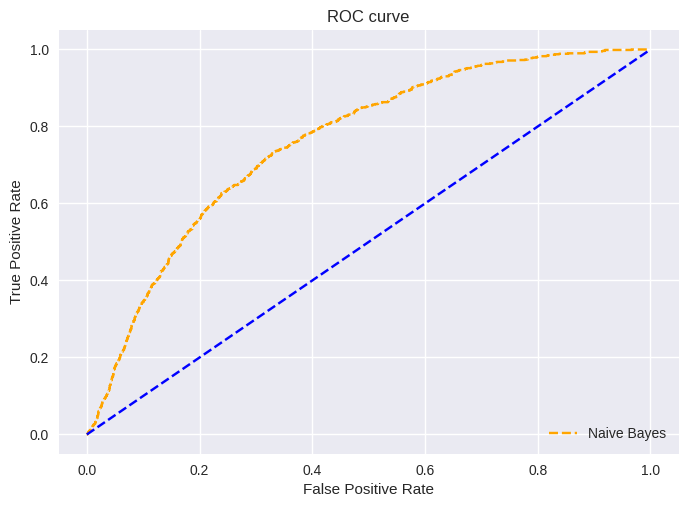

In [49]:
# Evaluating the model on Training data

# Predicting the labels for train data
y_pred = mnb_best.predict(X_w2v_test_norm)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_w2v_test_norm)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model with Word2Vec embeddings and SMOTE performs moderately on the training data.

- The **F1-score for the negative class (-1) is 0.78**, indicating decent performance in identifying non-propagandistic articles, with **a recall of 0.67**.

- The **F1-score for the positive class (1) is 0.34**, suggesting limited performance in identifying propagandistic articles, with **a recall of 0.74**.

- The **ROC AUC score of 0.70** indicates that the model's ability to differentiate between the two classes is moderate. .

In [50]:
# Checking validation data

valid_data.head()

,text_preprocessed,propaganda_label
0,"convened examine cause civil unrest black communities, presidential commission issued report stark conclusion: america moving towards two societies, ""one black, one white — separate unequal."" fifty year historic kerner commission identified ""white racism"" key cause ""pervasive discrimination employment, education housing,"" progress african american fare comparison white come homeownership, unemployment incarceration, according report economic policy institute released monday. cases, african american worse today civil right movement culminated law barring housing voter discrimination well ra...",-1
1,"discriminating someone basis sexual orientation prohibited federal civil right law, federal appeal court ruled monday sided gay skydiving instructor fired job discussing sexuality client. decision u.s. court appeal 2nd circuit offer expanded protection lgbt people mark significant loss president donald trump justice department, filed brief arguing title vii civil right act cover sexual orientation discrimination. state law still murky, federal circuit part country issued mixed opinions. ruling 2nd circuit, based manhattan, could appealed supreme court. justice department spokesman devin o'...",-1
2,"bill cosby year old daughter, ensa cosby, died massachusetts kidney disease, spokesman comedian said monday. spokesman andrew wyatt immediately offer detail death friday. ""please keep cosby family prayer give peace time,"" said. bill cosby lost another five child year old son, ennis, graduate student columbia university, shot death changing flat tire near freeway ramp los angeles. year old man later convicted sentenced life prison without parole. bill cosby, 80, owns home western massachusetts town shelburne falls. ensa cosby spoke father behalf trial last year charge drugged molested woman...",-1
3,"fast moving, powerful theatrical locomotive “murder orient express” hartford stage march 25, make stop syria, paris snowbound, tree lined landscape between. really want broadway. though character speak host top european accents, patter new york snappy. show’s designer broadway regular — costume designer extraordinaire william ivey long (a natural gig, done recent broadway revival “on twentieth century”), scenic designer beowulf boritt (“come away,” “meteor shower”), lighting designer ken billington (who worked boritt “sunday park george” “act one”), sound designer darron l. west (a regular...",-1
4,"friday. national pizza day. grab life slice. not? connecticut all. footing national pizza lore remains solid ever. hartford, option pie plentiful. new haven, even better — like thin slightly charred. hardest choice, without doubt, go. you’re bold, take tour. half dozen option you’re hartford area: angelina’s hartford. boast biggest slice around. true pizza detective needed investigate claim, likely won’t leave hungry. handout angelina is: prospect ave, hartford, ct angelina is: prospect ave, hartford, ct (handout) couple turn away, you’ve got lena’s first & last pizzaria hartford parkville...",-1


Confusion Matrix

[[2815 1735]
 [ 147  428]]


Classification Report

              precision    recall  f1-score   support

          -1       0.95      0.62      0.75      4550
           1       0.20      0.74      0.31       575

    accuracy                           0.63      5125
   macro avg       0.57      0.68      0.53      5125
weighted avg       0.87      0.63      0.70      5125


ROC AUC Score: 0.6815145723841376


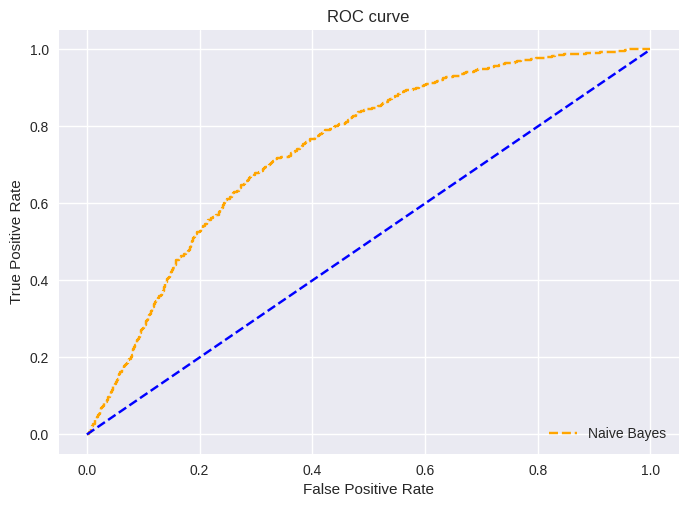

In [51]:
# Evaluating the model on Validation dataset

# Transforming the validation data into word2vec format using the same vectorizer
X_w2v_test = np.array([vectorize(sentence) for sentence in valid_data.text_preprocessed])

# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_train_resampled)
X_w2v_test_norm = scaler.transform(X_w2v_test)


# Changing the label name
y_test = valid_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_w2v_test_norm)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_w2v_test_norm)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations on the Validation Dataset:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model with Word2Vec embeddings and SMOTE performs moderately on the validation data.

- The **F1-score for the negative class (-1) is 0.75**, indicating decent performance in identifying non-propagandistic articles, with **a recall of 0.62**.

- The **F1-score for the positive class (1) is 0.31**, suggesting limited performance in identifying propagandistic articles, with **a recall of 0.74**.

- The **ROC AUC score of 0.68** indicates that the model's ability to differentiate between the two classes is moderate. .

In [52]:
# Checking test data

test_data.head()

,text_preprocessed,propaganda_label
0,"eat connecticut teamed end hunger connecticut (ehc) first ever 'culinary corner pub crawl,' jan. 20. crawl featured top blue back square pub restaurants. proceeds benefit ehc program outreach efforts. diner purchased special bracelets, entitled percent discount flora, vinted, india, cook bear, artisan restaurant. participant map stamped venue. jeannette dardenne, co owns eat connecticut, said crawl let community sample food drink west hartford premier restaurant support great cause. dardenne co owner kristen fritz founded social influencer group guide people fun activity supporting local c...",-1
1,"owner old pennsylvania power plant that’s target connecticut anti air pollution lawsuit reached deal sierra club stop burning coal facility peak summer ozone month starting 2023. agreement talen energy, owner high pollution brunner island generating facility, sierra club official halt burning coal power plant may september beginning start phase plan 2023. coal use year old plant ended consent decree, still need court approval. connecticut authority environmental group year demanding federal action clean pollution brunner island steam electric station. cite study showing emission plant drif...",-1
2,"majority owner president donald trump hotel latin america abruptly ordered trump employee property thursday, triggering confrontation trump employee refused leave asked police intervene, according trump organization local news reports. attempt takeover orestes fintiklis — cypriot businessman based miami — marked sharp escalation fintiklis month old effort brand trump international hotel panama replace trump organization manager. fintiklis blame trump brand trump company declining revenue empty rooms. but, far, tactic confined lawsuit angry letters. changed thursday, fintiklis group others ...",-1
3,"connecticut’s likely option using toll help fund transportation project involves “congestion pricing” system charge driver rush hour le peak times, according top state official. state could bring much $750 million year toll revenue using congestion pricing, according transportation commissioner james redeker. warned state commission last month would involve “tolling every interstate limited access [highway] state roads.” way achieve level revenue would put toll state roads, including route 2, 8, merritt parkway, redeker said december hearing commission fiscal stability economic growth. “we...",-1
4,"escaped prisoner jerry mercado back connecticut. year old hartford man escaped carl robinson correctional institution enfield jan. 7. housed northern correctional institution somers, known state’s supermax prison. mercado extradited canton, ga., held since arrest local police jan. 17. initially fought extradition, later waived right. caught, mercado bleached hair eyebrow made effort cover notorious neck tattoo reads: “time wait one.” department correction’s fugitive investigation unit, working concert u.s. marshal fugitive task force connecticut state police, developed intelligence placing...",-1


Confusion Matrix

[[5456 3563]
 [ 257  883]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.60      0.74      9019
           1       0.20      0.77      0.32      1140

    accuracy                           0.62     10159
   macro avg       0.58      0.69      0.53     10159
weighted avg       0.87      0.62      0.69     10159


ROC AUC Score: 0.689753259687638


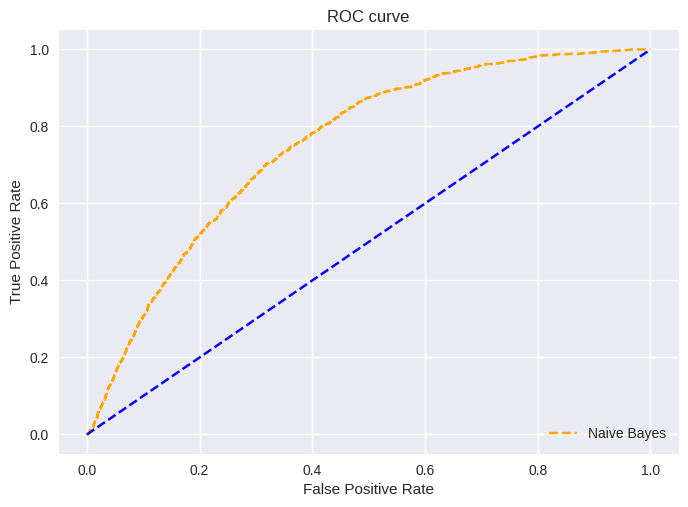

In [53]:
# Evaluating the model on test dataset

# Transforming the validation data into word2vec format using the same vectorizer
X_w2v_test = np.array([vectorize(sentence) for sentence in test_data.text_preprocessed])

# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_train_resampled)
X_w2v_test_norm = scaler.transform(X_w2v_test)


# Changing the label name
y_test = test_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_w2v_test_norm)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_w2v_test_norm)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations on the Test Dataset:**

- The **F1-score for the negative class (-1) is 0.74**, indicating decent performance in identifying non-propagandistic articles, with a **recall of 0.60**.

- The **F1-score for the positive class (1) is 0.32**, suggesting limited performance in identifying propagandistic articles, with a **recall of 0.77**.

- The **ROC AUC score of 0.69** indicates that the model's ability to differentiate between the two classes is moderate.

### **4. Google News Vectors - Word2Vec**

In [54]:
#Select the features and the target

X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [55]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [56]:
# Creating train/test list of sentences

train_articles = [sentence.split() for sentence in X_train]
test_articles = [sentence.split() for sentence in X_test]

In [57]:
%%time

# Path to dataset
word2vec_path = "/content/drive/My Drive/Design Project/GoogleNews-vectors-negative300.bin.gz"

# Load 200,000 most common words
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=200000)

CPU times: user 4.59 s, sys: 512 ms, total: 5.11 s
Wall time: 11.6 s


In [58]:
# Get word vector
test_word = w2v_model['election']

# Print shape and vector
print('Vector dimension:', test_word.shape)

Vector dimension: (300,)


In [59]:
# Query word vectors

word = 'trump'
most_similar_words = w2v_model.most_similar(word)
similarity_score = w2v_model.similarity('trump', 'business')

print(f"Most similar words to '{word}': {most_similar_words}")
print(f"Similarity score between 'trump' and 'business': {similarity_score}")

Most similar words to 'trump': [('trumps', 0.7198434472084045), ('trumping', 0.580585241317749), ('supersede', 0.5600422620773315), ('trumped', 0.5497318506240845), ('supercede', 0.5309919118881226), ('prevail', 0.487763375043869), ('outweigh', 0.47853273153305054), ('trample', 0.4714253544807434), ('overshadow', 0.4701153635978699), ('dictate', 0.46754559874534607)]
Similarity score between 'trump' and 'business': 0.07233818620443344


In [60]:
w2v_words = list(w2v_model.index_to_key)

print("number of words that occured minimum 5 times ", len(w2v_words))

print("sample words", w2v_words[0:50])

number of words that occured minimum 5 times  200000
sample words ['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out']


In [61]:
# Transforming preprocessed text data into Word2Vec encoded features

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model[word] for word in words if word in w2v_model]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_w2v_train = np.array([vectorize(sentence) for sentence in X_train])
X_w2v_test = np.array([vectorize(sentence) for sentence in X_test])

X_w2v_train.shape, X_w2v_test.shape

((28788, 300), (7198, 300))

              precision    recall  f1-score   support

          -1       0.89      1.00      0.94      6394
           1       0.00      0.00      0.00       804

    accuracy                           0.89      7198
   macro avg       0.44      0.50      0.47      7198
weighted avg       0.79      0.89      0.84      7198



Text(0.5, 1.0, 'Confusion Matrix')

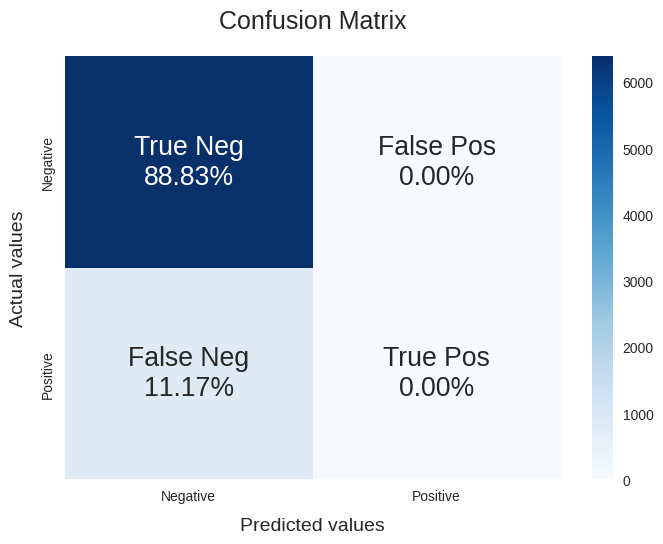

In [62]:
# Multinomial Naive Bayes without SMOTE

# Training a Multinomial Naive Bayes classifier on the training set

# instantiating the model
mnb = MultinomialNB()

# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_w2v_train)
X_w2v_test_norm = scaler.transform(X_w2v_test)


# fit the model
mnb.fit(X_w2v_train_norm, y_train)

y_pred = mnb.predict(X_w2v_test_norm)


# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **Multinomial Naive Bayes (MNB)** model trained with Word2Vec embeddings on the training data without using **SMOTE** yields suboptimal results.

- The model's performance is skewed toward the **negative class (-1) with an F1-score of 0.94**, indicating strong performance in identifying non-propagandistic articles. However, **the recall for the negative class is 1.00**, suggesting that the model may be overfitting to this class.

- The model struggles to classify articles as **propagandistic (positive class 1)**, with an **F1-score and recall of 0.00**, indicating that it performs very poorly in identifying such articles.

              precision    recall  f1-score   support

          -1       0.96      0.78      0.86      6394
           1       0.31      0.76      0.44       804

    accuracy                           0.78      7198
   macro avg       0.64      0.77      0.65      7198
weighted avg       0.89      0.78      0.82      7198



Text(0.5, 1.0, 'Confusion Matrix')

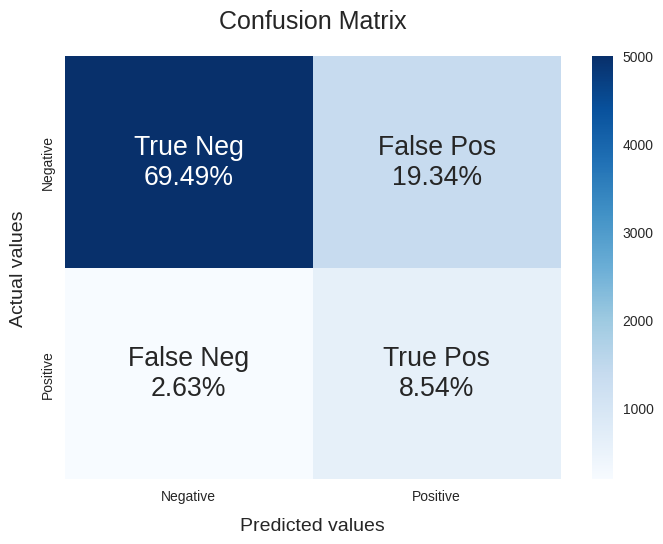

In [63]:
# Multinomial Naive Bayes with SMOTE

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_w2v_train, y_train)


# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_train_resampled)
X_w2v_test_norm = scaler.transform(X_w2v_test)


# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(X_w2v_train_norm, y_train_resampled)

# Predict on test data
y_pred = mnb.predict(X_w2v_test_norm)


# Print classification report
print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **F1-score for the negative class (-1) is 0.86**, indicating strong performance in identifying non-propagandistic articles. The **recall for the negative class is 0.78**, suggesting a good balance between precision and recall.

- **The F1-score for the positive class (1) is 0.44**, indicating moderate performance in identifying propagandistic articles. The **recall for the positive class is 0.76**, showing that the model performs reasonably well in detecting such articles.

- The model trained with SMOTE significantly improves its ability to identify propagandistic articles while maintaining strong performance in identifying non-propagandistic content. This balanced performance is crucial for real-world applications where the consequences of false negatives and false positives can vary.

In [64]:
%%time

# Hyperparameter tuning

# Creating model instance
mnb = MultinomialNB()

# specifying all hyperparameters with possible values
param= {"alpha": [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000], "fit_prior": [True, False]}

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

# Hyperparameter tuning using Gridsearch
model= GridSearchCV(estimator= mnb, param_grid=param, scoring="f1", cv=folds, return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_w2v_train_norm, y_train_resampled)

CPU times: user 47.8 s, sys: 42.1 s, total: 1min 29s
Wall time: 55.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000, 2500, 5000, 10000],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='f1')

In [65]:
# printing best hyperparameters

print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.801880416259
Best hyperparameters:  {'alpha': 2500, 'fit_prior': False}


In [66]:
# Building model again with best params

mnb_best = MultinomialNB(alpha = 2500, fit_prior= False )

mnb_best.fit(X_w2v_train_norm, y_train_resampled)

MultinomialNB(alpha=2500, fit_prior=False)

Confusion Matrix

[[4645 1749]
 [ 142  662]]


Classification Report

              precision    recall  f1-score   support

          -1       0.97      0.73      0.83      6394
           1       0.27      0.82      0.41       804

    accuracy                           0.74      7198
   macro avg       0.62      0.77      0.62      7198
weighted avg       0.89      0.74      0.78      7198


ROC AUC Score: 0.7749226964956263


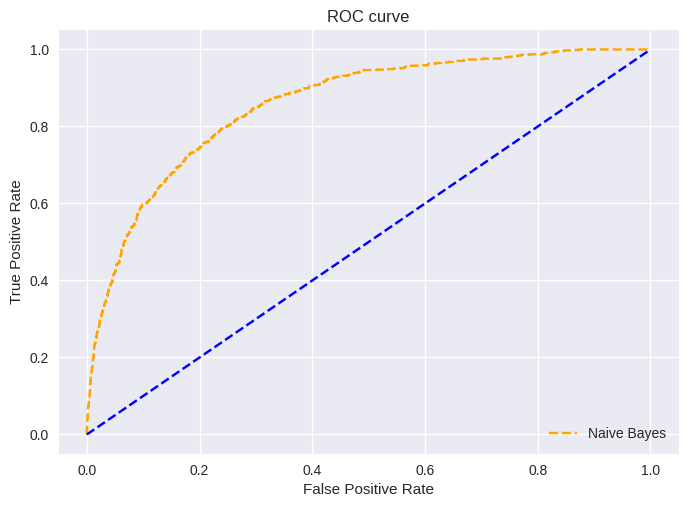

In [67]:
# Evaluating the model on Training data

# Predicting the labels for train data
y_pred = mnb_best.predict(X_w2v_test_norm)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_w2v_test_norm)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model with Word2Vec embeddings demonstrates significant improvements compared to the previous models.

- The **F1-score for the negative class (-1) is 0.83**, indicating strong performance in identifying non-propagandistic articles, with **a recall of 0.73**.

- The **F1-score for the positive class (1) is 0.41**, suggesting moderate performance in identifying propagandistic articles, with **a recall of 0.82**.

- The **ROC AUC score of 0.77** indicates that the model has a reasonably good ability to differentiate between the two classes, with a balanced performance between precision and recall.

In [68]:
# Checking validation data

valid_data.head()

,text_preprocessed,propaganda_label
0,"convened examine cause civil unrest black communities, presidential commission issued report stark conclusion: america moving towards two societies, ""one black, one white — separate unequal."" fifty year historic kerner commission identified ""white racism"" key cause ""pervasive discrimination employment, education housing,"" progress african american fare comparison white come homeownership, unemployment incarceration, according report economic policy institute released monday. cases, african american worse today civil right movement culminated law barring housing voter discrimination well ra...",-1
1,"discriminating someone basis sexual orientation prohibited federal civil right law, federal appeal court ruled monday sided gay skydiving instructor fired job discussing sexuality client. decision u.s. court appeal 2nd circuit offer expanded protection lgbt people mark significant loss president donald trump justice department, filed brief arguing title vii civil right act cover sexual orientation discrimination. state law still murky, federal circuit part country issued mixed opinions. ruling 2nd circuit, based manhattan, could appealed supreme court. justice department spokesman devin o'...",-1
2,"bill cosby year old daughter, ensa cosby, died massachusetts kidney disease, spokesman comedian said monday. spokesman andrew wyatt immediately offer detail death friday. ""please keep cosby family prayer give peace time,"" said. bill cosby lost another five child year old son, ennis, graduate student columbia university, shot death changing flat tire near freeway ramp los angeles. year old man later convicted sentenced life prison without parole. bill cosby, 80, owns home western massachusetts town shelburne falls. ensa cosby spoke father behalf trial last year charge drugged molested woman...",-1
3,"fast moving, powerful theatrical locomotive “murder orient express” hartford stage march 25, make stop syria, paris snowbound, tree lined landscape between. really want broadway. though character speak host top european accents, patter new york snappy. show’s designer broadway regular — costume designer extraordinaire william ivey long (a natural gig, done recent broadway revival “on twentieth century”), scenic designer beowulf boritt (“come away,” “meteor shower”), lighting designer ken billington (who worked boritt “sunday park george” “act one”), sound designer darron l. west (a regular...",-1
4,"friday. national pizza day. grab life slice. not? connecticut all. footing national pizza lore remains solid ever. hartford, option pie plentiful. new haven, even better — like thin slightly charred. hardest choice, without doubt, go. you’re bold, take tour. half dozen option you’re hartford area: angelina’s hartford. boast biggest slice around. true pizza detective needed investigate claim, likely won’t leave hungry. handout angelina is: prospect ave, hartford, ct angelina is: prospect ave, hartford, ct (handout) couple turn away, you’ve got lena’s first & last pizzaria hartford parkville...",-1


Confusion Matrix

[[3411 1139]
 [ 115  460]]


Classification Report

              precision    recall  f1-score   support

          -1       0.97      0.75      0.84      4550
           1       0.29      0.80      0.42       575

    accuracy                           0.76      5125
   macro avg       0.63      0.77      0.63      5125
weighted avg       0.89      0.76      0.80      5125


ROC AUC Score: 0.7748351648351648


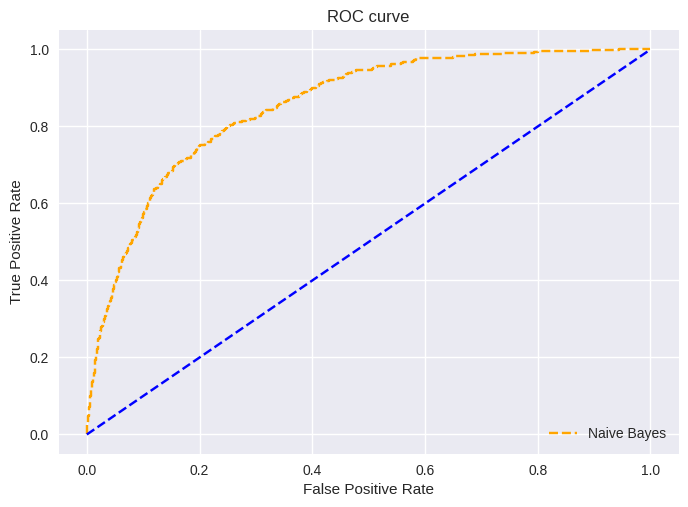

In [69]:
# Evaluating the model on Validation dataset

# Transforming the validation data into word2vec format using the same vectorizer
X_w2v_test = np.array([vectorize(sentence) for sentence in valid_data.text_preprocessed])

# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_train_resampled)
X_w2v_test_norm = scaler.transform(X_w2v_test)


# Changing the label name
y_test = valid_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_w2v_test_norm)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_w2v_test_norm)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model continues to demonstrate improved performance on the validation data, similar to what was observed on the training data.

- The **F1-score for the negative class (-1) is 0.84**, indicating strong performance in identifying non-propagandistic articles, with **a recall of 0.75**.

- The **F1-score for the positive class (1) is 0.42**, suggesting moderate performance in identifying propagandistic articles, with **a recall of 0.80**.

- The R**OC AUC score of 0.77** indicates that the model's ability to differentiate between the two classes remains strong on the validation data.

- Overall, the hyperparameter-tuned model maintains its performance characteristics on the validation data, suggesting that it is not overfitting to the training data.

In [70]:
# Checking test data

test_data.head()

,text_preprocessed,propaganda_label
0,"eat connecticut teamed end hunger connecticut (ehc) first ever 'culinary corner pub crawl,' jan. 20. crawl featured top blue back square pub restaurants. proceeds benefit ehc program outreach efforts. diner purchased special bracelets, entitled percent discount flora, vinted, india, cook bear, artisan restaurant. participant map stamped venue. jeannette dardenne, co owns eat connecticut, said crawl let community sample food drink west hartford premier restaurant support great cause. dardenne co owner kristen fritz founded social influencer group guide people fun activity supporting local c...",-1
1,"owner old pennsylvania power plant that’s target connecticut anti air pollution lawsuit reached deal sierra club stop burning coal facility peak summer ozone month starting 2023. agreement talen energy, owner high pollution brunner island generating facility, sierra club official halt burning coal power plant may september beginning start phase plan 2023. coal use year old plant ended consent decree, still need court approval. connecticut authority environmental group year demanding federal action clean pollution brunner island steam electric station. cite study showing emission plant drif...",-1
2,"majority owner president donald trump hotel latin america abruptly ordered trump employee property thursday, triggering confrontation trump employee refused leave asked police intervene, according trump organization local news reports. attempt takeover orestes fintiklis — cypriot businessman based miami — marked sharp escalation fintiklis month old effort brand trump international hotel panama replace trump organization manager. fintiklis blame trump brand trump company declining revenue empty rooms. but, far, tactic confined lawsuit angry letters. changed thursday, fintiklis group others ...",-1
3,"connecticut’s likely option using toll help fund transportation project involves “congestion pricing” system charge driver rush hour le peak times, according top state official. state could bring much $750 million year toll revenue using congestion pricing, according transportation commissioner james redeker. warned state commission last month would involve “tolling every interstate limited access [highway] state roads.” way achieve level revenue would put toll state roads, including route 2, 8, merritt parkway, redeker said december hearing commission fiscal stability economic growth. “we...",-1
4,"escaped prisoner jerry mercado back connecticut. year old hartford man escaped carl robinson correctional institution enfield jan. 7. housed northern correctional institution somers, known state’s supermax prison. mercado extradited canton, ga., held since arrest local police jan. 17. initially fought extradition, later waived right. caught, mercado bleached hair eyebrow made effort cover notorious neck tattoo reads: “time wait one.” department correction’s fugitive investigation unit, working concert u.s. marshal fugitive task force connecticut state police, developed intelligence placing...",-1


Confusion Matrix

[[6654 2365]
 [ 255  885]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.74      0.84      9019
           1       0.27      0.78      0.40      1140

    accuracy                           0.74     10159
   macro avg       0.62      0.76      0.62     10159
weighted avg       0.89      0.74      0.79     10159


ROC AUC Score: 0.7570457980520654


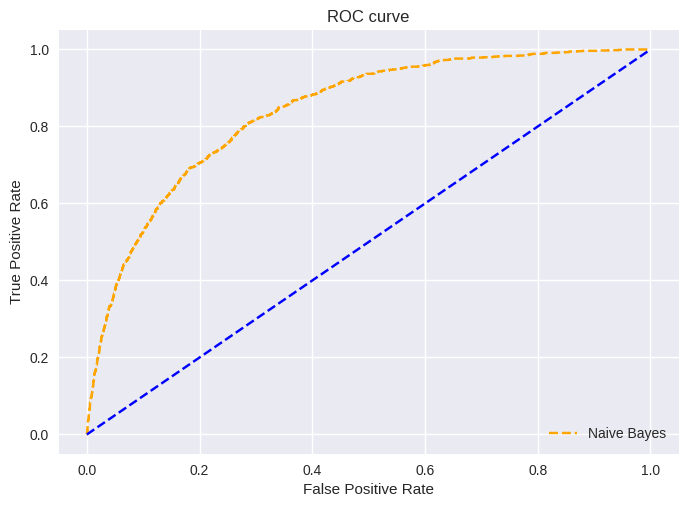

In [71]:
# Evaluating the model on test dataset

# Transforming the validation data into word2vec format using the same vectorizer
X_w2v_test = np.array([vectorize(sentence) for sentence in test_data.text_preprocessed])

# Normalizing the data using MinMaxScaler to avoid sending negative values to the model
scaler = MinMaxScaler()
X_w2v_train_norm = scaler.fit_transform(X_train_resampled)
X_w2v_test_norm = scaler.transform(X_w2v_test)



# Changing the label name
y_test = test_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_w2v_test_norm)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_w2v_test_norm)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model continues to show a similar level of performance on the test data as observed on the validation data.

- The **F1-score for the negative class (-1) is 0.84**, indicating strong performance in identifying non-propagandistic articles, with **a recall of 0.74**.

- The **F1-score for the positive class (1) is 0.40**, suggesting moderate performance in identifying propagandistic articles, with **a recall of 0.78**.

- The **ROC AUC score of 0.76** indicates that the model's ability to distinguish between the two classes remains strong on the test data.

- The model's performance on the test data aligns well with its performance on the validation and training data, suggesting that it generalizes effectively to different datasets.

### **5. LDA**

In [72]:
#Select the features and the target

X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [73]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [74]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Creating a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Applying LDA
num_topics = 5
lda = LatentDirichletAllocation(n_components = num_topics, random_state=50)

X_train_topics = lda.fit_transform(X_train_vec)
X_test_topics = lda.transform(X_test_vec)

# Extracting the topics
topics = lda.components_

CPU times: user 4min 33s, sys: 4.94 s, total: 4min 38s
Wall time: 4min 38s


In [75]:
for topic_idx, topic in enumerate(topics):

    print(f"Topic {topic_idx}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])}")


Topic 0: china, state, year, trump, said
Topic 1: syria, israeli, state, israel, said
Topic 2: police, time, people, year, said
Topic 3: government, minister, korea, north, said
Topic 4: house, state, president, trump, said


              precision    recall  f1-score   support

          -1       0.89      1.00      0.94      6394
           1       0.00      0.00      0.00       804

    accuracy                           0.89      7198
   macro avg       0.44      0.50      0.47      7198
weighted avg       0.79      0.89      0.84      7198

CPU times: user 213 ms, sys: 75.6 ms, total: 288 ms
Wall time: 271 ms


Text(0.5, 1.0, 'Confusion Matrix')

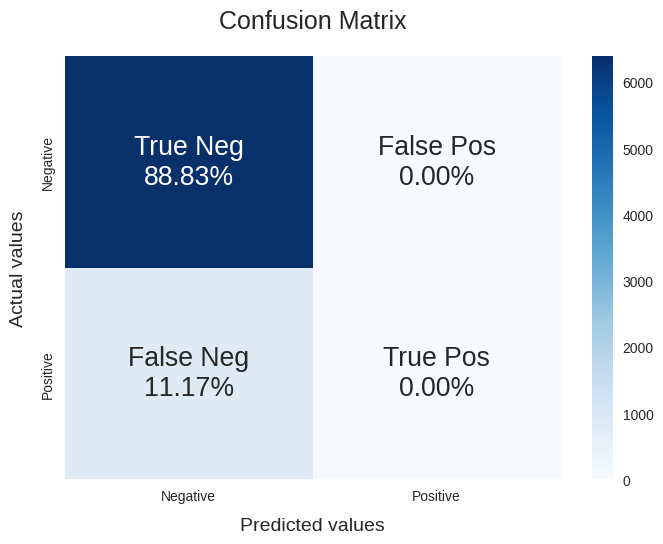

In [76]:
%%time

# Multinomial Naive Bayes without SMOTE


# Training a Multinomial Naive Bayes classifier on the training set

# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(X_train_topics, y_train)

y_pred = mnb.predict(X_test_topics)


# Print classification report
print(classification_report(y_test, y_pred))

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **F1-score for the negative class (-1) remains high at 0.94**, indicating strong performance in identifying non-propagandistic articles, with **a recall of 1.00**.

- However, the **F1-score for the positive class (1) is still extremely low at 0.00**, suggesting a complete inability to identify propagandistic articles, with **a recall of 0.00**.

- While the model performs well in identifying non-propagandistic articles, it is essentially unable to detect propagandistic articles. This suggests that the LDA-based topic modeling approach may not be effectively capturing the features necessary to distinguish between the two classes.

              precision    recall  f1-score   support

          -1       0.95      0.63      0.76      6394
           1       0.20      0.74      0.32       804

    accuracy                           0.65      7198
   macro avg       0.58      0.69      0.54      7198
weighted avg       0.87      0.65      0.71      7198



Text(0.5, 1.0, 'Confusion Matrix')

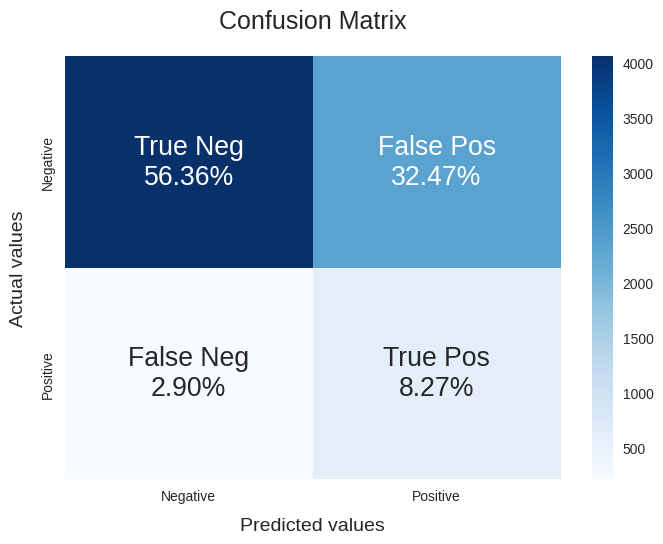

In [77]:
# Multinomial Naive Bayes with SMOTE

from imblearn.over_sampling import SMOTE
from scipy.sparse import csr_matrix

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_topics, y_train)


# instantiating the model
mnb = MultinomialNB()

# fit the model
mnb.fit(X_train_resampled, y_train_resampled)

y_pred = mnb.predict(X_test_topics)

# Print classification report
print(classification_report(y_test, y_pred))

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Observations:**

- The **F1-score for the negative class (-1) is 0.76**, indicating decent performance in identifying non-propagandistic articles, with **a recall of 0.63**.

- The **F1-score for the positive class (1) is 0.32**, suggesting limited performance in identifying propagandistic articles, with **a recall of 0.74**.

- While SMOTE helps in addressing the class imbalance issue and improves the model's recall for the positive class, there is still a need for further fine-tuning.

In [78]:
%%time

# Hyperparameter tuning

# Creating model instance
mnb = MultinomialNB()

# specifying all hyperparameters with possible values
param= {"alpha": [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000], "fit_prior": [True, False]}

# Create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)

# Hyperparameter tuning using Gridsearch
model= GridSearchCV(estimator= mnb, param_grid=param, scoring="f1", cv=folds, return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train_resampled, y_train_resampled)

CPU times: user 13 s, sys: 9.44 s, total: 22.4 s
Wall time: 13.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                   1000, 2500, 5000, 10000],
                         'fit_prior': [True, False]},
             return_train_score=True, scoring='f1')

In [79]:
# printing best hyperparameters

print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.7159545232709617
Best hyperparameters:  {'alpha': 5000, 'fit_prior': True}


In [80]:
# Building model again with best params

mnb_best = MultinomialNB(alpha = 5000, fit_prior= True )

mnb_best.fit(X_train_resampled, y_train_resampled)

MultinomialNB(alpha=5000)

In [81]:
# Train data performance

# Predict on test data
y_pred = mnb_best.predict(X_test_topics)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.59      0.73      6394
           1       0.19      0.79      0.31       804

    accuracy                           0.61      7198
   macro avg       0.58      0.69      0.52      7198
weighted avg       0.87      0.61      0.68      7198



Confusion Matrix

[[3778 2616]
 [ 171  633]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.59      0.73      6394
           1       0.19      0.79      0.31       804

    accuracy                           0.61      7198
   macro avg       0.58      0.69      0.52      7198
weighted avg       0.87      0.61      0.68      7198


ROC AUC Score: 0.6890899350603876


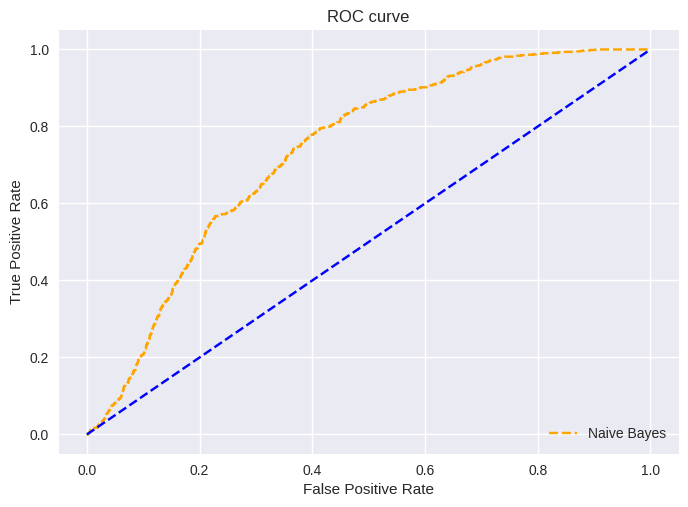

In [82]:
# Evaluating the model on Training data

# Predicting the labels for train data
y_pred = mnb_best.predict(X_test_topics)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_test_topics)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The **F1-score for the negative class (-1) is 0.73**, indicating decent performance in identifying non-propagandistic articles, with **a recall of 0.59**.

- The **F1-score for the positive class (1) is 0.31**, suggesting limited performance in identifying propagandistic articles, with a **recall of 0.79**.

- The **ROC AUC score of 0.69** indicates that the model's ability to differentiate between the two classes is moderate.

In [83]:
# Checking validation data

valid_data.head()

,text_preprocessed,propaganda_label
0,"convened examine cause civil unrest black communities, presidential commission issued report stark conclusion: america moving towards two societies, ""one black, one white — separate unequal."" fifty year historic kerner commission identified ""white racism"" key cause ""pervasive discrimination employment, education housing,"" progress african american fare comparison white come homeownership, unemployment incarceration, according report economic policy institute released monday. cases, african american worse today civil right movement culminated law barring housing voter discrimination well ra...",-1
1,"discriminating someone basis sexual orientation prohibited federal civil right law, federal appeal court ruled monday sided gay skydiving instructor fired job discussing sexuality client. decision u.s. court appeal 2nd circuit offer expanded protection lgbt people mark significant loss president donald trump justice department, filed brief arguing title vii civil right act cover sexual orientation discrimination. state law still murky, federal circuit part country issued mixed opinions. ruling 2nd circuit, based manhattan, could appealed supreme court. justice department spokesman devin o'...",-1
2,"bill cosby year old daughter, ensa cosby, died massachusetts kidney disease, spokesman comedian said monday. spokesman andrew wyatt immediately offer detail death friday. ""please keep cosby family prayer give peace time,"" said. bill cosby lost another five child year old son, ennis, graduate student columbia university, shot death changing flat tire near freeway ramp los angeles. year old man later convicted sentenced life prison without parole. bill cosby, 80, owns home western massachusetts town shelburne falls. ensa cosby spoke father behalf trial last year charge drugged molested woman...",-1
3,"fast moving, powerful theatrical locomotive “murder orient express” hartford stage march 25, make stop syria, paris snowbound, tree lined landscape between. really want broadway. though character speak host top european accents, patter new york snappy. show’s designer broadway regular — costume designer extraordinaire william ivey long (a natural gig, done recent broadway revival “on twentieth century”), scenic designer beowulf boritt (“come away,” “meteor shower”), lighting designer ken billington (who worked boritt “sunday park george” “act one”), sound designer darron l. west (a regular...",-1
4,"friday. national pizza day. grab life slice. not? connecticut all. footing national pizza lore remains solid ever. hartford, option pie plentiful. new haven, even better — like thin slightly charred. hardest choice, without doubt, go. you’re bold, take tour. half dozen option you’re hartford area: angelina’s hartford. boast biggest slice around. true pizza detective needed investigate claim, likely won’t leave hungry. handout angelina is: prospect ave, hartford, ct angelina is: prospect ave, hartford, ct (handout) couple turn away, you’ve got lena’s first & last pizzaria hartford parkville...",-1


Confusion Matrix

[[2630 1920]
 [ 108  467]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.58      0.72      4550
           1       0.20      0.81      0.32       575

    accuracy                           0.60      5125
   macro avg       0.58      0.70      0.52      5125
weighted avg       0.87      0.60      0.68      5125


ROC AUC Score: 0.6950979455327282


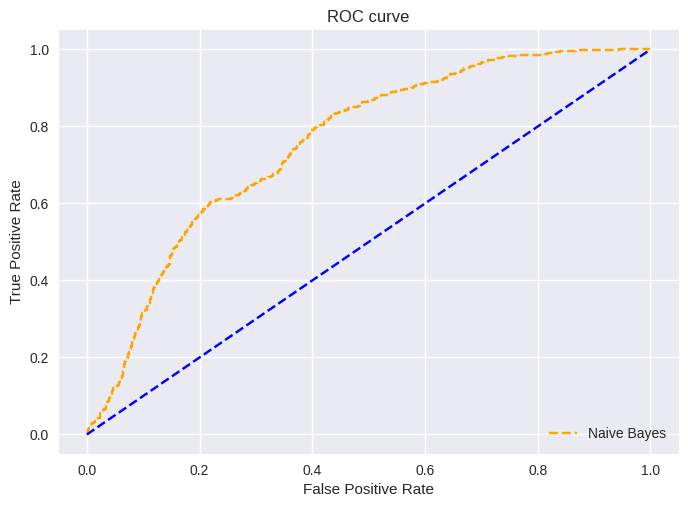

In [84]:
# Evaluating the model on Validation dataset

# Transforming the validation data into bag-of-words format using the same vectorizer and then applying LDA
X_test_vec = vectorizer.transform(valid_data.text_preprocessed)
X_test_topics = lda.transform(X_test_vec)

# Changing the label name
y_test = valid_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_test_topics)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_test_topics)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model, trained on topics extracted using LDA, performs moderately on the validation data.

- The **F1-score for the negative class (-1) is 0.72**, indicating decent performance in identifying non-propagandistic articles, with a **recall of 0.58**.

- The **F1-score for the positive class (1) is 0.32**, suggesting limited performance in identifying propagandistic articles, with a r**ecall of 0.81**.

- The **ROC AUC score of 0.70** indicates that the model's ability to differentiate between the two classes is moderate.

- It's also worth considering that the model's performance on the validation data is consistent with its performance on the training data, suggesting that it's not overfitting to the training data.

In [85]:
# Checking test data

test_data.head()

,text_preprocessed,propaganda_label
0,"eat connecticut teamed end hunger connecticut (ehc) first ever 'culinary corner pub crawl,' jan. 20. crawl featured top blue back square pub restaurants. proceeds benefit ehc program outreach efforts. diner purchased special bracelets, entitled percent discount flora, vinted, india, cook bear, artisan restaurant. participant map stamped venue. jeannette dardenne, co owns eat connecticut, said crawl let community sample food drink west hartford premier restaurant support great cause. dardenne co owner kristen fritz founded social influencer group guide people fun activity supporting local c...",-1
1,"owner old pennsylvania power plant that’s target connecticut anti air pollution lawsuit reached deal sierra club stop burning coal facility peak summer ozone month starting 2023. agreement talen energy, owner high pollution brunner island generating facility, sierra club official halt burning coal power plant may september beginning start phase plan 2023. coal use year old plant ended consent decree, still need court approval. connecticut authority environmental group year demanding federal action clean pollution brunner island steam electric station. cite study showing emission plant drif...",-1
2,"majority owner president donald trump hotel latin america abruptly ordered trump employee property thursday, triggering confrontation trump employee refused leave asked police intervene, according trump organization local news reports. attempt takeover orestes fintiklis — cypriot businessman based miami — marked sharp escalation fintiklis month old effort brand trump international hotel panama replace trump organization manager. fintiklis blame trump brand trump company declining revenue empty rooms. but, far, tactic confined lawsuit angry letters. changed thursday, fintiklis group others ...",-1
3,"connecticut’s likely option using toll help fund transportation project involves “congestion pricing” system charge driver rush hour le peak times, according top state official. state could bring much $750 million year toll revenue using congestion pricing, according transportation commissioner james redeker. warned state commission last month would involve “tolling every interstate limited access [highway] state roads.” way achieve level revenue would put toll state roads, including route 2, 8, merritt parkway, redeker said december hearing commission fiscal stability economic growth. “we...",-1
4,"escaped prisoner jerry mercado back connecticut. year old hartford man escaped carl robinson correctional institution enfield jan. 7. housed northern correctional institution somers, known state’s supermax prison. mercado extradited canton, ga., held since arrest local police jan. 17. initially fought extradition, later waived right. caught, mercado bleached hair eyebrow made effort cover notorious neck tattoo reads: “time wait one.” department correction’s fugitive investigation unit, working concert u.s. marshal fugitive task force connecticut state police, developed intelligence placing...",-1


Confusion Matrix

[[5436 3583]
 [ 216  924]]


Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.60      0.74      9019
           1       0.21      0.81      0.33      1140

    accuracy                           0.63     10159
   macro avg       0.58      0.71      0.53     10159
weighted avg       0.88      0.63      0.69     10159


ROC AUC Score: 0.7066269454543332


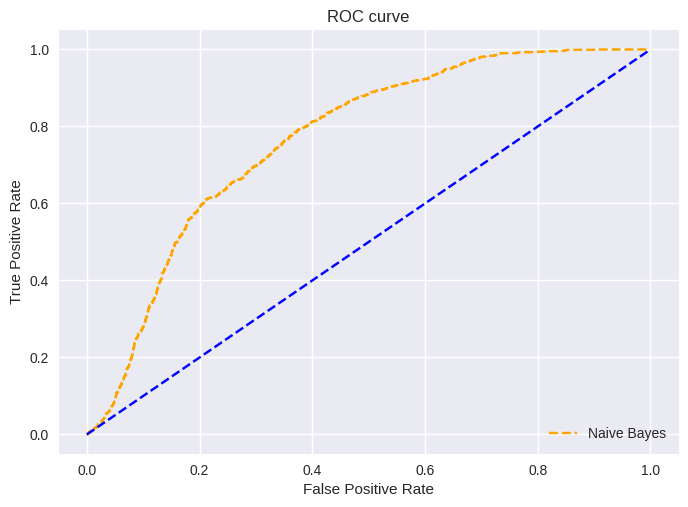

In [86]:
# Evaluating the model on test dataset

# Transforming the test data into bag-of-words format using the same vectorizer and then applying LDA
X_test_vec = vectorizer.transform(test_data.text_preprocessed)
X_test_topics = lda.transform(X_test_vec)

# Changing the label name
y_test = test_data.propaganda_label

# Predicting the labels for validation data
y_pred = mnb_best.predict(X_test_topics)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

# Get probabilities
y_pred_proba = mnb_best.predict_proba(X_test_topics)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# roc curve for random classifier tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Visualize the ROC curve
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Observations:**

- The hyperparameter-tuned Multinomial Naive Bayes (MNB) model, trained on topics extracted using LDA, performs moderately on the test data.

- The **F1-score for the negative class (-1) is 0.74**, indicating decent performance in identifying non-propagandistic articles, with **a recall of 0.60**.

- The **F1-score for the positive class (1) is 0.33**, suggesting limited performance in identifying propagandistic articles, with **a recall of 0.81**.

- The **ROC AUC score of 0.71** indicates that the model's ability to differentiate between the two classes is moderate.

- It's worth noting that the model's performance on the test data is consistent with its performance on the validation and training data, suggesting that it's not overfitting to the training data.

#**Summary**

In [96]:
# Using Prettytable for displaying the observations

from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["S.No","Model", "Vectorizer", "Hyper Parameters", "Accuracy", "F1 - Negative Class(-1)","F1 - Positive Class(1)","AUC Score"]

print(table)

+------+-------+------------+------------------+----------+-------------------------+------------------------+-----------+
| S.No | Model | Vectorizer | Hyper Parameters | Accuracy | F1 - Negative Class(-1) | F1 - Positive Class(1) | AUC Score |
+------+-------+------------+------------------+----------+-------------------------+------------------------+-----------+
+------+-------+------------+------------------+----------+-------------------------+------------------------+-----------+


In [97]:
## Adding rows to the table

table.add_row([1,"Naive Bayes", "Bag Of Words", " 'alpha': 0.00001, 'fit_prior': True' ", 0.93, 0.96, 0.69, 0.81])
table.add_row([2,"Naive Bayes", "TF-IDF", " 'alpha': 0.00001, 'fit_prior': True' ", 0.91, 0.95, 0.68, 0.87])
table.add_row([3,"Naive Bayes", "Word2Vec", " 'alpha': 0.00001, 'fit_prior': False' ", 0.62, 0.74, 0.32, 0.69])
table.add_row([4,"Naive Bayes", "Google News Vectors - Word2Vec", " 'alpha': 2500, 'fit_prior': False' ", 0.74, 0.84, 0.40, 0.76])
table.add_row([5,"Naive Bayes", "LDA", " 'alpha': 5000, 'fit_prior': True' ", 0.63, 0.74, 0.33, 0.70])

In [98]:
print(table)

+------+-------------+--------------------------------+-----------------------------------------+----------+-------------------------+------------------------+-----------+
| S.No |    Model    |           Vectorizer           |             Hyper Parameters            | Accuracy | F1 - Negative Class(-1) | F1 - Positive Class(1) | AUC Score |
+------+-------------+--------------------------------+-----------------------------------------+----------+-------------------------+------------------------+-----------+
|  1   | Naive Bayes |          Bag Of Words          |   'alpha': 0.00001, 'fit_prior': True'  |   0.93   |           0.96          |          0.69          |    0.81   |
|  2   | Naive Bayes |             TF-IDF             |   'alpha': 0.00001, 'fit_prior': True'  |   0.91   |           0.95          |          0.68          |    0.87   |
|  3   | Naive Bayes |            Word2Vec            |  'alpha': 0.00001, 'fit_prior': False'  |   0.62   |           0.74          |      

##**Heat Map - Performance of all the Vectorizers**

In [99]:
import pandas as pd
import plotly.express as px

data = {
    "S.No": [1, 2, 3, 4, 5],
    "Model": ["Naive Bayes"] * 5,
    "Vectorizer": ["Bag Of Words", "TF-IDF", "Word2Vec", "Google News Vectors - Word2Vec", "LDA"],
    "Hyper Parameters": [
        "'alpha': 0.00001, 'fit_prior': True'",
        "'alpha': 0.00001, 'fit_prior': True'",
        "'alpha': 0.00001, 'fit_prior': False'",
        "'alpha': 2500, 'fit_prior': False'",
        "'alpha': 5000, 'fit_prior': True'"
    ],
    "Accuracy": [0.93, 0.91, 0.62, 0.74, 0.63],
    "F1 - Negative Class(-1)": [0.96, 0.95, 0.74, 0.84, 0.74],
    "F1 - Positive Class(1)": [0.69, 0.68, 0.32, 0.40, 0.33],
    "AUC Score": [0.81, 0.87, 0.69, 0.76, 0.70]
}

df = pd.DataFrame(data)

# Create an annotated heatmap using Plotly
fig = px.imshow(
    df.drop(["S.No", "Model", "Vectorizer", "Hyper Parameters"], axis=1),
    labels=dict(x="Metrics", y="Models", color="Value"),
    x=df.columns[4:],  # Excluding non-numeric columns
    y=df.Vectorizer,
    color_continuous_scale="Tealgrn",
    title="Logistic Regression Performance",
)

# Add text annotations to the heatmap with respective column values
for i in range(len(df.Vectorizer)):
    for j in range(len(df.columns[4:])):
        value = df.iloc[i, j + 4]  # Use j+4 to access the actual value in the DataFrame
        fig.add_annotation(
            text=str(value),
            x=df.columns[4:][j],
            y=df.Vectorizer.iloc[i],
            showarrow=False,
            font=dict(color="white"),  # Font color for text annotations
        )

fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Vectorizer",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    autosize=False,
    width=1200,  # Adjust the width as needed
    height=800,  # Adjust the height as needed
)

fig.show()


###**Animated bubble plot showing ROC scores**

In [100]:
import plotly.express as px
import pandas as pd

data = {
    "Model": ["Naive Bayes", "Naive Bayes", "Naive Bayes", "Naive Bayes", "Naive Bayes"],
    "Vectorizer": ["Bag Of Words", "TF-IDF", "Word2Vec", "Google News Vectors - Word2Vec", "LDA"],
    "ROC Score": [0.81, 0.87, 0.69, 0.76, 0.70],
    "Hyper Parameters": [" 'alpha': 0.00001, 'fit_prior': True' ",
                         " 'alpha': 0.00001, 'fit_prior': True' ",
                         " 'alpha': 0.00001, 'fit_prior': False' ",
                         " 'alpha': 2500, 'fit_prior': False' ",
                         " 'alpha': 5000, 'fit_prior': True' "]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the animated bubble plot
fig = px.scatter(df, x="Model", y="ROC Score", animation_frame="Vectorizer",
                 color="Vectorizer", size="ROC Score", text="ROC Score",
                 title="ROC Score vs. Vectorizer (Animated)", labels={"ROC Score": "ROC Score"})

# Customize the appearance of the plot
fig.update_traces(marker=dict(sizemode='diameter'), selector=dict(mode='markers+text'))
fig.update_xaxes(categoryorder='total descending')

# Show the animated bubble plot
fig.show()

###**Line Plot displaying ROC scores**

In [101]:
import plotly.express as px
import pandas as pd

data = {
    "Model": ["Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression"],
    "Vectorizer": ["Bag Of Words", "TF-IDF", "Word2Vec", "Google News Vectors - Word2Vec", "LDA"],
    "ROC Score": [0.81, 0.87, 0.69, 0.76, 0.70],
    "Hyper Parameters": ["'alpha': 0.00001, 'fit_prior': True' ",
                         " 'alpha': 0.00001, 'fit_prior': True' ",
                         " 'alpha': 0.00001, 'fit_prior': False' ",
                         " 'alpha': 2500, 'fit_prior': False' ",
                         " 'alpha': 5000, 'fit_prior': True'"],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the line plot
fig = px.line(df, x="Vectorizer", y="ROC Score", color="Model", text="ROC Score",
              title="ROC Score vs. Vectorizer (Lines by Model)",
              labels={"ROC Score": "ROC Score", "Vectorizer": "Vectorizer", "Model": "Model"})

# Customize the text position
fig.update_traces(textposition='top center')

# Show the line plot
fig.show()
